In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
%matplotlib inline

In [23]:
test= pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [24]:
print(train.shape,test.shape)

(290129, 20) (124341, 19)


In [25]:
train.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

In [27]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis = 1, inplace = True )

### Let's talk about the data 

we can see that we have alot off null values in this data we want to handle. 

Now we want to explain every column represent what !

* ID: An identification number or code assigned to each car listing in the dataset. It is a unique identifier that distinguishes one listing from another.

* Price:The price of the used car listed for sale. It represents the asking price set by the seller.

* Year:The year of manufacture or production of the vehicle. It indicates the age of the car.

* Manufacturer: The brand or manufacturer of the car, such as Toyota, Honda, Ford, etc.

* Model: The specific model or variant of the car, such as Camry, Civic, Mustang, etc.

* Condition:Describes the condition of the car, which can range from new to excellent, good, fair, or salvage. It provides an indication of the overall state of the vehicle.(ordianl)

* Cylinders: The number of cylinders in the car's engine. It indicates the engine's configuration and affects the performance of the vehicle.

* Fuel:The type of fuel used by the car, such as gasoline, diesel, electric, hybrid, or other alternative fuels.

* Odometer: The recorded mileage or distance traveled by the vehicle. It gives an indication of the car's usage and can influence its value.

* Title Status: Refers to the status of the car's title or ownership documents, such as clean, salvage, rebuilt, or lien. It provides information about the legal status of the vehicle.

* Transmission:Specifies the type of transmission system in the car, such as manual, automatic, or continuously variable transmission (CVT).

* Drive: Indicates the drivetrain configuration of the vehicle, such as front-wheel drive (FWD), rear-wheel drive (RWD), all-wheel drive (AWD), or four-wheel drive (4WD).

* Size: Describes the size or class of the car, such as compact, mid-size, full-size, SUV, truck, etc.

* Type: Refers to the body type or style of the car, such as sedan, coupe, hatchback, SUV, truck, convertible, etc.

* Paint Color: Specifies the exterior color of the car, such as black, white, red, blue, etc.

* State:Indicates the state or location where the car is listed for sale.

* Latitude (Lat) and Longitude (Long): The geographical coordinates of the location where the car is listed. It allows for mapping and geospatial analysis.

* Posting Date: The date and time when the car listing was posted or made available for sale.

These fields provide a comprehensive set of information about used cars, enabling various analyses and insights into the market dynamics, pricing trends, vehicle characteristics, and buyer preferences

# EDA


## Data Cleaning

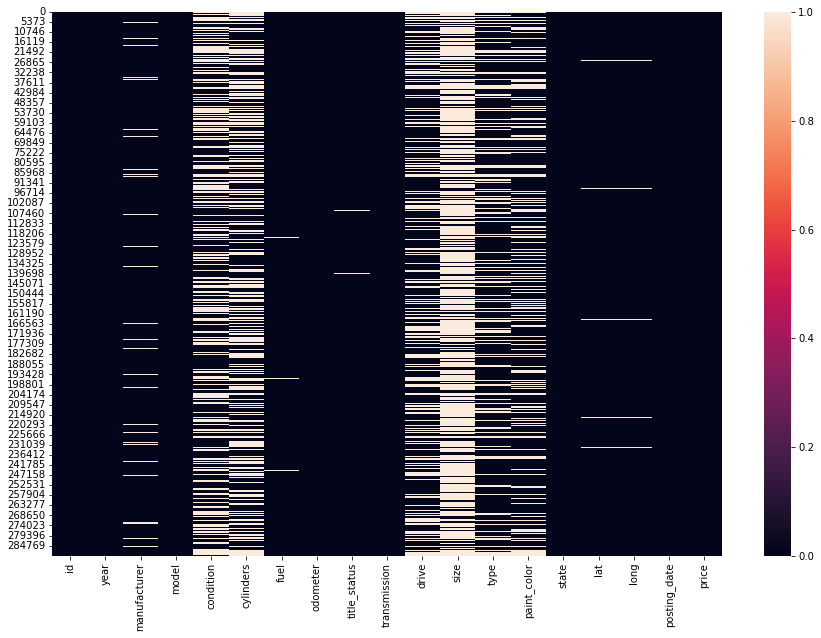

In [28]:
# check null values 
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull())
plt.show()

In [157]:
# check for duplicates without id column for train and test data 

print('train duplicated data',train.duplicated(subset=train.columns.difference(['id'])).sum())

print('test duplicated data',test.duplicated(subset=test.columns.difference(['id'])).sum())

train duplicated data 234
test duplicated data 30


In [158]:
# drop duplicates 
train.drop_duplicates(subset=train.columns.difference(['id']),inplace=True)

test.drop_duplicates(subset=test.columns.difference(['id']),inplace=True)

In [7]:
# we can see that we have alot off null values in this data 
# this is hard but we wanna to do it 
train.isna().sum()

id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

### fill manufacturer column 


In [29]:
# define list with the most manufacture appears in real life

manufacturer_list = [
    'toyota', 'volkswagen', 'gm', 'hyundai', 'ford', 'honda', 'nissan', 'bmw', 'fca', 'daimler',
    'subaru', 'mazda', 'renault', 'tata', 'geely', 'kia', 'suzuki', 'volvo', 'peugeot', 'mitsubishi',
    'greatwall', 'saic', 'changan', 'byd', 'proton', 'mahindra', 'isuzu', 'astonmartin', 'lotus', 'jeep',
    'ram', 'lexus', 'audi', 'cadillac', 'chrysler', 'acura', 'buick', 'infiniti', 'mini', 'pontiac', 'jaguar',
    'rover', 'porsche', 'mercury', 'saturn', 'alfa-romeo', 'tesla', 'harley-davidson', 'ferrari', 'datsun',
    'landrover', 'haval', 'brilliance', 'gac', 'jac', 'saipa', 'byton', 'lucid', 'rimac', 'polestar', 'xiaopeng', 'lynkco',
    'nissho', 'iveco', 'baic', 'bellier', 'jmc', 'gaz', 'gwm', 'gacmotor', 'baw', 'chery', 'sceo',
    'bugatti', 'lincoln', 'bentley', 'lamborghini', 'astonmartin', 'rollsroyce', 'maybach', 'pagani',
    'koenigsegg', 'spyker', 'hennessey', 'ariel', 'vector','chevrolet', 'mercedes-benz']


In [30]:
# some manuall catching for some model and it's manufacture 
custom_dict = {'hino':'toyota','freightliner':'freightliner','scion':'toyota','smart':'mercedes-benz','hummar':'gm'}

In [31]:
# function to clean text and get good results 
def clean_text(text):
    if len(text)> 1 :
        text = text.lower()
        if all(char in string.punctuation or char.isspace() for char in text):
            return "special"
        #keep a-z character
        text = re.sub(r'[^a-zA-Z\s\d]', ' ', text)

        text = ' '.join(text.split())

        return str(text)
    else : 
        return (text)


In [15]:
nan_man = train[train.manufacturer.isna()]
for i in range(nan_man.shape[0]):
    a = nan_man.model.iloc[i]
    a = clean_text(a)
    
    a = a.split()
    for j in a :
        if j in custom_dict :
            print(custom_dict[j])
            break
    for j in a:
        if j in manufacturer_list:
            print(j)
            break

toyota
freightliner
suzuki
toyota
toyota
bentley
suzuki
toyota
toyota
toyota
toyota
freightliner
isuzu
toyota
suzuki
toyota
toyota
freightliner
mercedes-benz
freightliner
toyota
toyota
freightliner
mercedes-benz
isuzu
freightliner
toyota
jeep
toyota
freightliner
toyota
toyota
toyota
toyota
freightliner
toyota
toyota
toyota
toyota
toyota
toyota
lamborghini
freightliner
toyota
isuzu
mercedes-benz
suzuki
freightliner
toyota
isuzu
isuzu
lamborghini
mercedes-benz
toyota
isuzu
isuzu
toyota
freightliner
ford
toyota
freightliner
freightliner
toyota
toyota
toyota
toyota
toyota
isuzu
freightliner
toyota
isuzu
isuzu
isuzu
bentley
suzuki
freightliner
toyota
suzuki
freightliner
toyota
mercedes-benz
toyota
isuzu
toyota
toyota
isuzu
freightliner
toyota
freightliner
ford
mercedes-benz
freightliner
chevrolet
lamborghini
isuzu
toyota
suzuki
rover
freightliner
freightliner
isuzu
freightliner
toyota
toyota
toyota
toyota
suzuki
rover
mercedes-benz
freightliner
toyota
toyota
freightliner
freightliner
merced

freightliner
freightliner
toyota
toyota
mercedes-benz
toyota
toyota
isuzu
freightliner
toyota
lamborghini
isuzu
suzuki
mercedes-benz
lotus
toyota
freightliner
freightliner
ford
mercedes-benz
toyota
freightliner
suzuki
toyota
freightliner
freightliner
mercedes-benz
toyota
isuzu
lamborghini
toyota
isuzu
suzuki
isuzu
toyota
volkswagen
isuzu
freightliner
hyundai
bentley
toyota
toyota
mercedes-benz
toyota
bmw
freightliner
toyota
toyota
toyota
freightliner
toyota
freightliner
toyota
suzuki
toyota
ram
freightliner
mercedes-benz
toyota
toyota
isuzu
toyota
toyota
mercedes-benz
toyota
toyota
isuzu
isuzu
suzuki
mercedes-benz
subaru
freightliner
freightliner
toyota
mercedes-benz
mercedes-benz
nissan
isuzu
toyota
freightliner
toyota
toyota
isuzu
toyota
toyota
bentley
mercedes-benz
toyota
toyota
toyota
toyota
toyota
suzuki
toyota
bentley
freightliner
toyota
toyota
freightliner
toyota
toyota
bentley
mercedes-benz
freightliner
isuzu
suzuki
toyota
freightliner
toyota
toyota
bentley
lamborghini
chrysler

toyota
freightliner
mercedes-benz
suzuki
freightliner
ford
toyota
freightliner
mercedes-benz
toyota
toyota
freightliner
toyota
isuzu
toyota
isuzu
mercedes-benz
toyota
isuzu
isuzu
toyota
toyota
isuzu
toyota
toyota
toyota
isuzu
toyota
toyota
toyota
suzuki
freightliner
mercedes-benz
freightliner
toyota
toyota
isuzu
toyota
bentley
suzuki
toyota
toyota
toyota
toyota
toyota
lamborghini
suzuki
suzuki
toyota
suzuki
suzuki
chevrolet
freightliner
toyota
toyota
toyota
suzuki
freightliner
toyota
toyota
toyota
ram
isuzu
suzuki
suzuki
toyota
toyota
toyota
bentley
mercedes-benz
toyota
toyota
toyota
toyota
toyota
freightliner
suzuki
toyota
suzuki
toyota
toyota
jeep
freightliner
suzuki
toyota
toyota
isuzu
freightliner
suzuki
toyota
toyota
bentley
freightliner
toyota
freightliner
toyota
toyota
freightliner
isuzu
toyota
toyota
isuzu
renault
toyota
mahindra
freightliner
lotus
freightliner
freightliner
isuzu
freightliner
toyota
suzuki
suzuki
toyota
bmw
mercedes-benz
toyota
toyota
freightliner
mercedes-benz

In [32]:
# filling approach 
# if element from manufacturer list appears in the model set manufacturer with that name 
# else if any catches that i made appears, fill with that catch 
# else fill the manufacturer the first words of the model (we don't have null values in model column)
def fill_manu(ma_list, cu_list, df):
    model = clean_text(df.model)
    manufacturer = df['manufacturer']
    
    if pd.notnull(manufacturer):
        return manufacturer

    brand = model.split()[0]
    
    if brand in cu_list:
        return custom_dict[brand]

    for word in model.split():
        if word in ma_list:
            return word

    return brand


In [33]:
sample_train = train.copy()

In [34]:
sample_train['manufacturer'] = sample_train.apply(lambda row : fill_manu(manufacturer_list,custom_dict,row),axis=1)

### Condition column

In [18]:
train.shape

(290129, 19)

In [48]:
sample_train.isna().sum()

id                                0
year                              0
manufacturer                      0
model                             0
condition                    116104
cylinders                    119300
fuel                           1453
odometer                          0
title_status                   5066
transmission                      0
drive                         88087
size                         207684
type                          62596
paint_color                   87113
state                             0
lat                            4403
long                           4403
posting_date                      0
price                             0
manufacturer_freq_encoded         0
model_freq_encoded                0
dtype: int64

In [54]:
!pip install xgboost

In [56]:
train.title_status.value_counts()

clean         275824
rebuilt         4924
salvage         2692
lien             981
missing          506
parts only       136
Name: title_status, dtype: int64

In [ ]:
title_dict = {'clean':6,'rebuilt':5,'salvage':4,}